# Importing Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Folders Path

In [2]:
path = glob.glob('C:/Users/DeeP_LeaRneR/0_Anaconda_Tariq_Ullah/cr7/*')
path2 = glob.glob('C:/Users/DeeP_LeaRneR/0_Anaconda_Tariq_Ullah/belli/*')
path3 = glob.glob('C:/Users/DeeP_LeaRneR/Downloads/test pictures/*')

# Getting Pictures Out from Folders

# Training Pictures

In [3]:
cr = []
for img in path:
    imgcr = cv2.imread(img)
    imgcr.resize(300, 300)
    cr.append(imgcr)

In [4]:
belli = []
for img2 in path2:
    imgbelli = cv2.imread(img2)
    imgbelli.resize(300, 300)
    belli.append(imgbelli)

# Testing Pictures

In [5]:
test = []
for file in path3:
    testing = cv2.imread(file)
    testing.resize(300, 300)
    test.append(testing)

# Adding Pictures of two folders and Making Array Of it.

In [6]:
f = cr + belli
feat = np.array(f)
feat.shape

(40, 300, 300)

# Labels For The Pictures 

In [ ]:
cristiano  = list(np.ones(20))
belli  = list(np.zeros(20))
label = np.array(cristiano + belli)

# Changing Color to rgb2gray

In [8]:
from skimage import color
x = color.rgb2gray(feat)
x.shape

C:\Users\DEEP_L~1\AppData\Local\Temp/ipykernel_7848/4016536078.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  x = color.rgb2gray(feat)


(40, 300)

# Labels for testing Data

In [9]:
first  = list(np.ones(10))
second  = list(np.zeros(10))
y_test = np.array(first + second)

# Creating Array of Test_data

In [10]:
test_data = np.array(test)
test_data.shape

(20, 300, 300)

# Changing color to rgb2gray

In [11]:
x_test = color.rgb2gray(test_data)

C:\Users\DEEP_L~1\AppData\Local\Temp/ipykernel_7848/859327807.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  x_test = color.rgb2gray(test_data)


# Scalling the Data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
xs = scaler.fit_transform(x)
xs_test = scaler.fit_transform(x_test)

# Training SVC Model For Pictures

In [15]:
from sklearn.svm import SVC

In [16]:
svm = SVC()

In [17]:
svm.fit(x, label)

SVC()

# checking Score 

In [18]:
from sklearn.metrics import accuracy_score, r2_score

# Predictions

In [19]:
svm_pred = svm.predict(xs_test)

# Accuracy

In [20]:
svmaccuracy = accuracy_score(y_test, svm_pred)*100
svmaccuracy

50.0

# Training KNN model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

In [23]:
knn.fit(x, label)

KNeighborsClassifier()

# Predictions And Accuracy Score

In [24]:
knn_pred = knn.predict(xs_test)

In [25]:
knnaccuracy = accuracy_score(y_test, knn_pred)*100
knnaccuracy

75.0

# Training Decision Tree Classifier Model

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier()

In [28]:
dtc.fit(x, label)

DecisionTreeClassifier()

# Predictions And Accuracy Score

In [29]:
dtcpred = dtc.predict(xs_test)

In [30]:
dtcaccuracy = accuracy_score(y_test, dtcpred)*100
dtcaccuracy

75.0

# Training RandomForestClassifier Model

In [31]:
rfc = RandomForestClassifier()

In [32]:
rfc.fit(x, label)

RandomForestClassifier()

# Predictions And Accuracy Score

In [33]:
rfcpred = rfc.predict(xs_test)

In [34]:
rfcaccuracy = accuracy_score(y_test , rfcpred)
rfcaccuracy

0.65

# Training model by splitting the same data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X,x,Y,y = train_test_split(x, label, test_size = 0.2, shuffle = True)

# Training Decision Tree Classifier Model

In [37]:
dtc1 = DecisionTreeClassifier()

In [38]:
dtc1.fit(X, Y)

DecisionTreeClassifier()

# Predictions And Accuracy Score

In [39]:
dtcpred1 = dtc1.predict(x)

In [40]:
dtcaccuracy1 = accuracy_score(y, dtcpred1)*100
dtcaccuracy1

50.0

# Training RandomForestClassifier Model

In [41]:
rfc1 = RandomForestClassifier()

In [42]:
rfc1.fit(X, Y)

RandomForestClassifier()

# Predictions And Accuracy Score

In [43]:
rfcpred1 = rfc1.predict(x)

In [44]:
rfcaccuracy1 = accuracy_score(y, rfcpred1)*100
rfcaccuracy1

62.5

# Training KNN Model

In [45]:
knn1 = KNeighborsClassifier()

In [46]:
knn1.fit(X,Y)

KNeighborsClassifier()

# Predictions And Accuracy Score

In [47]:
knn1_pred = knn1.predict(x)

In [48]:
knnaccuracy1 = accuracy_score(y, knn1_pred)*100
knnaccuracy1

37.5

# Training SVC Model

In [51]:
svc1 = SVC()

In [52]:
svc1.fit(X, Y)

SVC()

# Predictions And Accuracy Score

In [53]:
svcpred1 = svc1.predict(x)

In [59]:
svcaccuracy1 = accuracy_score(y, svcpred1)
svcaccuracy1

0.75

# HeatMap

In [71]:
import seaborn as sb
import pandas as pd

# Making A DataFrame of Accuracy Results

<AxesSubplot:>

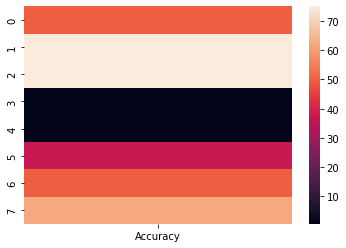

In [72]:
accuracy = {'Accuracy' : [svmaccuracy,knnaccuracy,dtcaccuracy,rfcaccuracy,svcaccuracy1,knnaccuracy1,dtcaccuracy1, rfcaccuracy1]}
df = pd.DataFrame(accuracy)
sb.heatmap(df)